In [9]:
%config Completer.use_jedi = False

from utils import *
from parallel import to_run, findpos, find_sigma_e

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool
from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

from ising_model import SimulateMH

from scipy import signal

In [2]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 80
plt.rcParams["figure.figsize"] = [12,8]

In [3]:
TTc = 2/np.log(1+np.sqrt(2))

In [4]:
pool = Pool(4)

In [5]:
with open("heat-capac-4-44-help.pkl", "rb")as ff:
    NtoT = pickle.load(ff)
NtoT[2] = 2.51

In [6]:
Ns = [2]
n = Ns[0]
eps = 0.002
while n < max(NtoT.keys()):
    if abs(NtoT[n] - NtoT[Ns[-1]]) > eps:
        Ns.append(n)
    n+=1

34


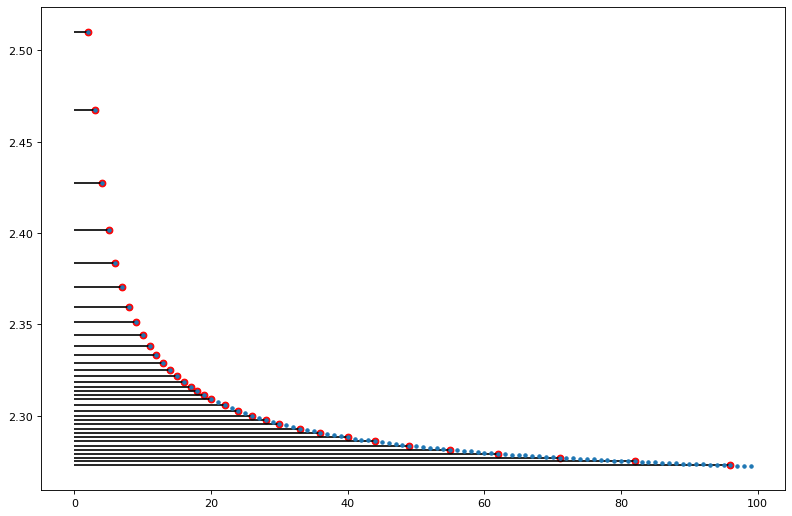

In [7]:
plt.plot(list(NtoT.keys()), list(NtoT.values()), ".")

for n in Ns:
    plt.scatter(n, NtoT[n], c="r")
    plt.hlines(y = NtoT[n], xmin=0, xmax=n)
print(len(Ns))

In [8]:
34*10/512/60*2048

22.666666666666668

In [ ]:
results = []
for N in Ns:
    TcN = NtoT[N]
    Ts = np.linspace(TcN-0.05, TcN+0.05, 2048)
    for Ts1 in tqdm(Ts.reshape(32, 64)):
        runs = len(Ts1)
        res = pool.starmap(find_sigma_e, #T, N,M, steps,freq, SEED
                zip(*(Ts1,
                      [N]*runs, # N
                      [10**7]*runs, # steps
                      [1]*runs, # freq
                      np.random.randint(0,10**8, runs), # seed
                          )),
    #             chunksize=1
            )
        results+= res

In [6]:
with open("heat-capac-2-96.pkl", "rb") as f:
    results = pickle.load(f)

In [7]:
df = pd.DataFrame(results, columns=["N", "temp", "len(Es)", "pos1","pos2", "mean_E", "std_E", "E^3", "E^4"])
df["C"] = df.std_E**2/df.temp**2

In [8]:
gb = df.groupby("N")

In [13]:
def find_peak(vals, l=5, r=30):
    pids = []
    for w in range(l,r):
        smooth =  np.convolve(vals, np.ones(w), mode="same")/w
        pids.append(np.argmax(smooth))
    return int(np.median(pids))

2 name 'curve_fit' is not defined
3 name 'curve_fit' is not defined
4 name 'curve_fit' is not defined
5 name 'curve_fit' is not defined
6 name 'curve_fit' is not defined
7 name 'curve_fit' is not defined
8 name 'curve_fit' is not defined
9 name 'curve_fit' is not defined
10 name 'curve_fit' is not defined
11 name 'curve_fit' is not defined
12 name 'curve_fit' is not defined
13 name 'curve_fit' is not defined
14 name 'curve_fit' is not defined
15 name 'curve_fit' is not defined
16 name 'curve_fit' is not defined
17 name 'curve_fit' is not defined
18 name 'curve_fit' is not defined
19 name 'curve_fit' is not defined
20 name 'curve_fit' is not defined
22 name 'curve_fit' is not defined
24 name 'curve_fit' is not defined
26 name 'curve_fit' is not defined
28 name 'curve_fit' is not defined
30 name 'curve_fit' is not defined
33 name 'curve_fit' is not defined
36 name 'curve_fit' is not defined
40 name 'curve_fit' is not defined
44 name 'curve_fit' is not defined
49 name 'curve_fit' is not d

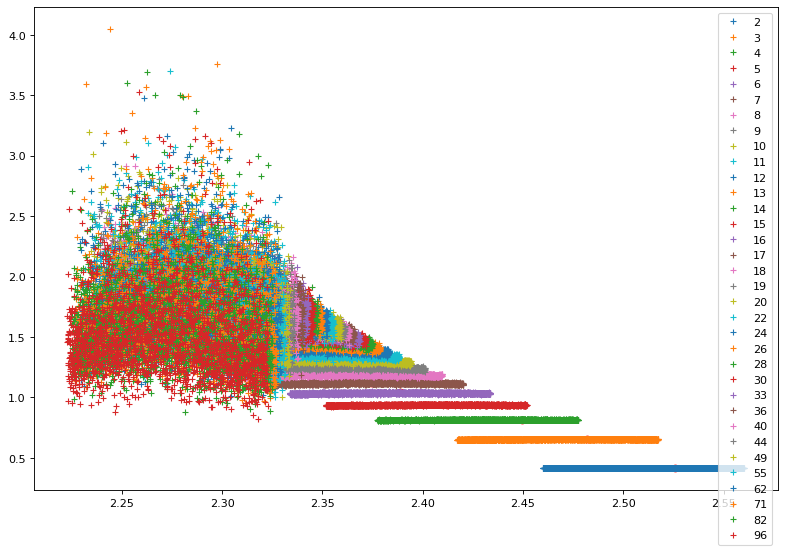

In [14]:
Ns = []
Tcs1 = []
Tcs2 = []
Tcs3 = []
Tcs3_err = []

for N in gb.groups:
    Ns.append(N)
    
    df4 = gb.get_group(N)
    plt.plot(df4.temp, df4.C/N**2,"+", label=f"{N}")
    
    pid = find_peak(df4.C, l=5, r=30)
    plt.scatter(df4.temp.iloc[pid], df4.C.iloc[pid]/N**2, c="r")
    
    Tcs1.append(df4.temp.iloc[pid])
    
    pid = find_peak(df4.C, l=10, r=60)
    plt.scatter(df4.temp.iloc[pid], df4.C.iloc[pid]/N**2, c="b", s=10)
    
    Tcs2.append(df4.temp.iloc[pid])
    def f(x, p, a, b):
        return a - b*abs(x-(p))**(2)
    try:
        popt, popt_cov = curve_fit(f, df4.temp, df4.C/N**2, maxfev=3000, 
                                  p0=[TTc+0.3, 1.5, 1])
        Tcs3.append(popt[0])
        Tcs3_err.append(popt_cov[0,0]**0.5)
        
    except Exception as e:
        Tcs3.append(np.nan)
        Tcs3_err.append(np.nan)
        print(N, e)
    
plt.legend()

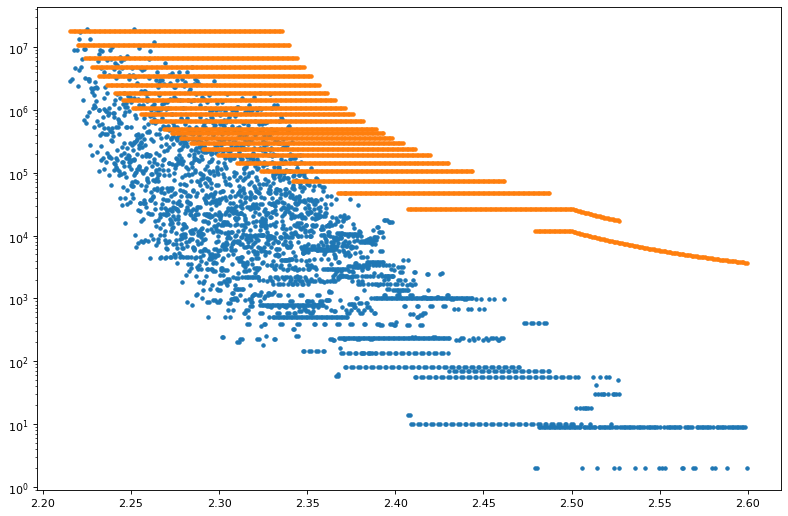

In [193]:
plt.plot(df.temp, df.pos1, ".")
plt.plot(df.temp, df.pos2, ".")
plt.gca().set_yscale("log")

In [ ]:
xs = np.linspace(-5,5,100)
plt.plot(xs, f(xs, *popt))

In [97]:
popt

array([ 9.24191846e-01,  1.01141075e+02, -3.83340587e+03, -7.21063541e+01])

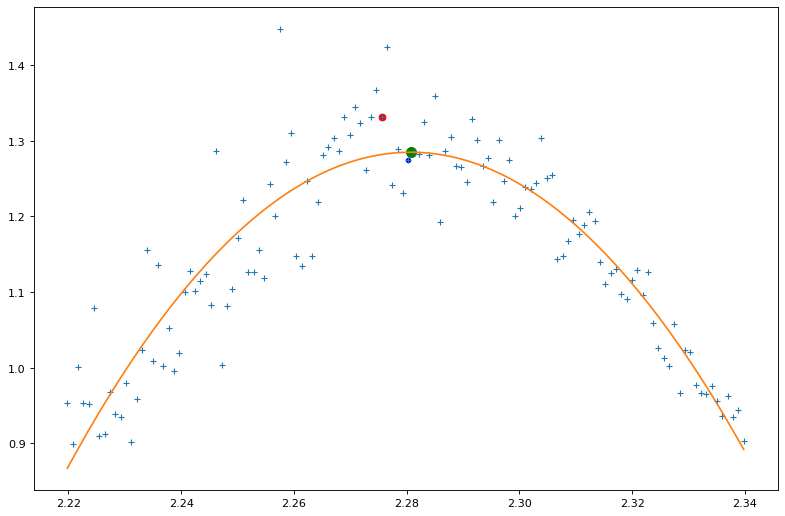

In [188]:
df4 = gb.get_group(60)
plt.plot(df4.temp, df4.C/N**2,"+", label=f"{N}")

def f(x, p, a, b):
        return a - b*abs(x-(p))**(2)
popt, popt_cov = curve_fit(f, df4.temp, df4.C/N**2, maxfev=3000, 
                                  p0=[TTc+0.3, 1.5, 1])
plt.plot(df4.temp, f(df4.temp, *popt))
plt.scatter(popt[0], f(popt[0], *popt), c="g", s=80)

pid = find_peak(df4.C, l=5, r=30)
plt.scatter(df4.temp.iloc[pid], df4.C.iloc[pid]/N**2, c="r")
pid = find_peak(df4.C, l=10, r=60)
plt.scatter(df4.temp.iloc[pid], df4.C.iloc[pid]/N**2, c="b", s=15)

In [141]:
def f(x, Tc, a, nu):
    return Tc + a / (x ** (1/nu))
popt1, popt1_cov = curve_fit(f, Ns, Tcs1)
popt2, popt2_cov = curve_fit(f, Ns, Tcs2)
popt3, popt3_cov = curve_fit(f, Ns, Tcs3, sigma=np.array(Tcs3_err))

In [142]:
Tc, a, mu = popt1
print(f"T={Tc:0.3f} a={a:0.3f} mu={mu:0.3f}")
Tc_err, a_err, mu_err = np.sqrt(popt1_cov.diagonal())
print(f"T={Tc_err:0.6f} a={a_err:0.6f} mu={mu_err:0.6f}")


T=2.240 a=0.432 mu=1.655
T=0.009812 a=0.013579 mu=0.140050


In [183]:
l,r=5,-5
popt3, popt3_cov = curve_fit(f, Ns[l:r], Tcs3[l:r], sigma=np.array(Tcs3_err)[l:r])

Tc, a, mu = popt3
print(f"T={Tc:0.4f} a={a:0.3f} mu={mu:0.3f}    Tc = {TTc:0.5f}")
Tc_err, a_err, mu_err = np.sqrt(popt2_cov.diagonal())
print(f"T={Tc_err:0.4f} a={a_err:0.6f} mu={mu_err:0.6f}")


T=2.2639 a=0.597 mu=1.152    Tc = 2.26919
T=0.0087 a=0.012439 mu=0.124375


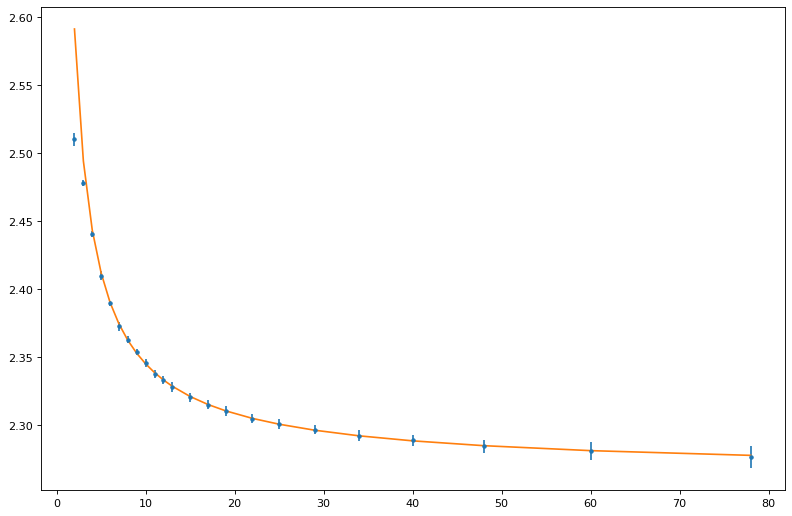

In [184]:
# plt.plot(Ns, Tcs1, "+")
# plt.plot(Ns, Tcs2, "+")
plt.errorbar(Ns, Tcs3, yerr=np.array(Tcs3_err)*10, fmt=".")
# plt.plot(Ns, f(np.array(Ns), *popt1))
plt.plot(Ns, f(np.array(Ns), *popt3))